<a href="https://colab.research.google.com/github/miatsivitse/Harmful-Brain-Activity-Classification/blob/main/HBA_DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HMS - Harmful Brain Activity Classification

Jin Jing, Zhen Lin, Chaoqi Yang, Ashley Chow, Sohier Dane, Jimeng Sun, M. Brandon Westover. (2024). HMS - Harmful Brain Activity Classification . Kaggle. https://kaggle.com/competitions/hms-harmful-brain-activity-classification

The goal of this competition is to detect and classify seizures and other types of harmful brain activity. You will develop a model trained on electroencephalography (EEG) signals recorded from critically ill hospital patients.

Your work may help rapidly improve electroencephalography pattern classification accuracy, unlocking transformative benefits for neurocritical care, epilepsy, and drug development. Advancement in this area may allow doctors and brain researchers to detect seizures or other brain damage to provide faster and more accurate treatments.

## Data Exploration

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Load files
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [4]:
train_data

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


In [5]:
test_data

,spectrogram_id,eeg_id,patient_id
0,853520,3911565283,6885


In [6]:
#EDA
print("Train dataset statistics:")
print(train_data.info())
print(train_data.describe())

print("\nTest dataset statistics:")
print(test_data.info())
print(test_data.describe())

Train dataset statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                  

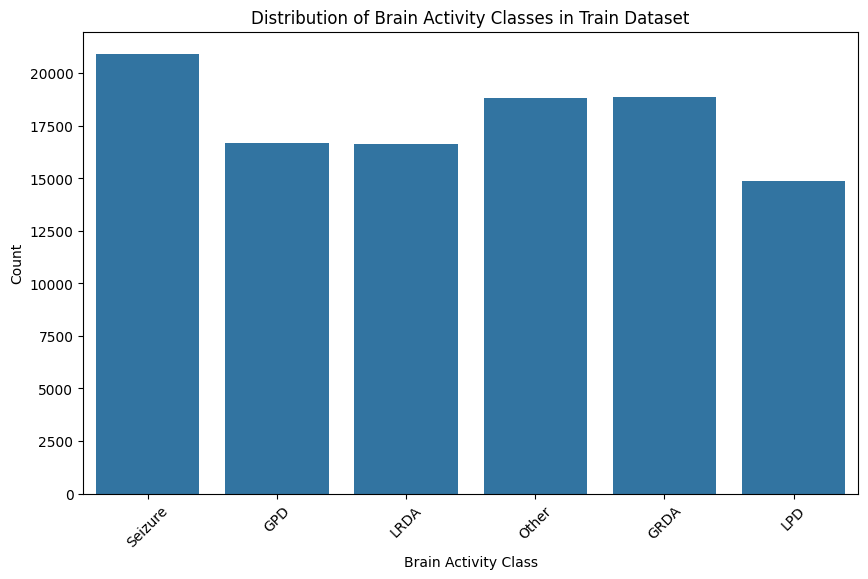

In [7]:
#Label distribution in training dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='expert_consensus')
plt.title('Distribution of Brain Activity Classes in Train Dataset')
plt.xlabel('Brain Activity Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Mia

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

##One Hot Encoding

#Encode the 'expert_consensus' column
encoder = OneHotEncoder(sparse=False)
encoded_labels = encoder.fit_transform(train_data[['expert_consensus']])
encoded_labels_df = pd.DataFrame(encoded_labels, columns=encoder.categories_[0])

#Concatenate encoded labels
train_data_encoded = pd.concat([train_data, encoded_labels_df], axis=1)
train_data_encoded.drop(columns=['expert_consensus'], inplace=True)

#Print class mapping
print("Class Mapping:")
for i, label in enumerate(encoder.categories_[0]):
    print(f"{i}: {label}")

Class Mapping:
0: GPD
1: GRDA
2: LPD
3: LRDA
4: Other
5: Seizure


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
##Normalization and Split Data

#Normalizing
scaler = StandardScaler()
numerical_features = ['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])

#Splitting data for training and testing (80% train, 20% test)
X = train_data_encoded.drop(columns=['label_id'])  # Features
y = train_data_encoded['label_id']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (85440, 19) (85440,)
Testing set shape: (21360, 19) (21360,)


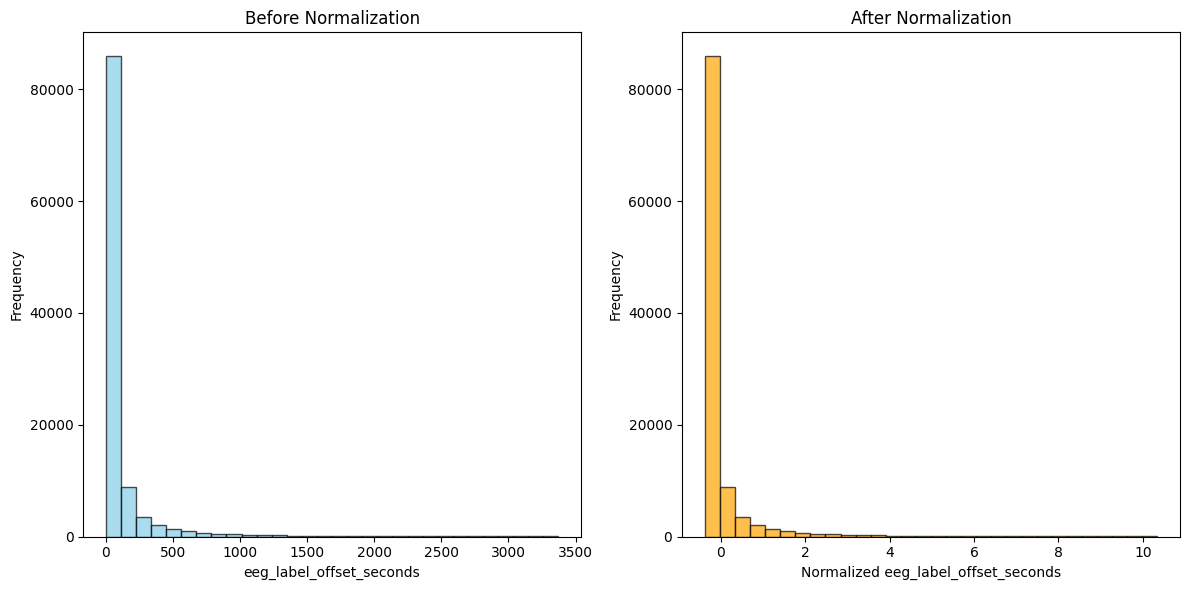

In [14]:
##Normalization plots

plt.figure(figsize=(12, 6))

#Before normalization
plt.subplot(1, 2, 1)
plt.hist(train_data['eeg_label_offset_seconds'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Before Normalization')
plt.xlabel('eeg_label_offset_seconds')
plt.ylabel('Frequency')

#After normalization
plt.subplot(1, 2, 2)
plt.hist(train_data_encoded['eeg_label_offset_seconds'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('After Normalization')
plt.xlabel('Normalized eeg_label_offset_seconds')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

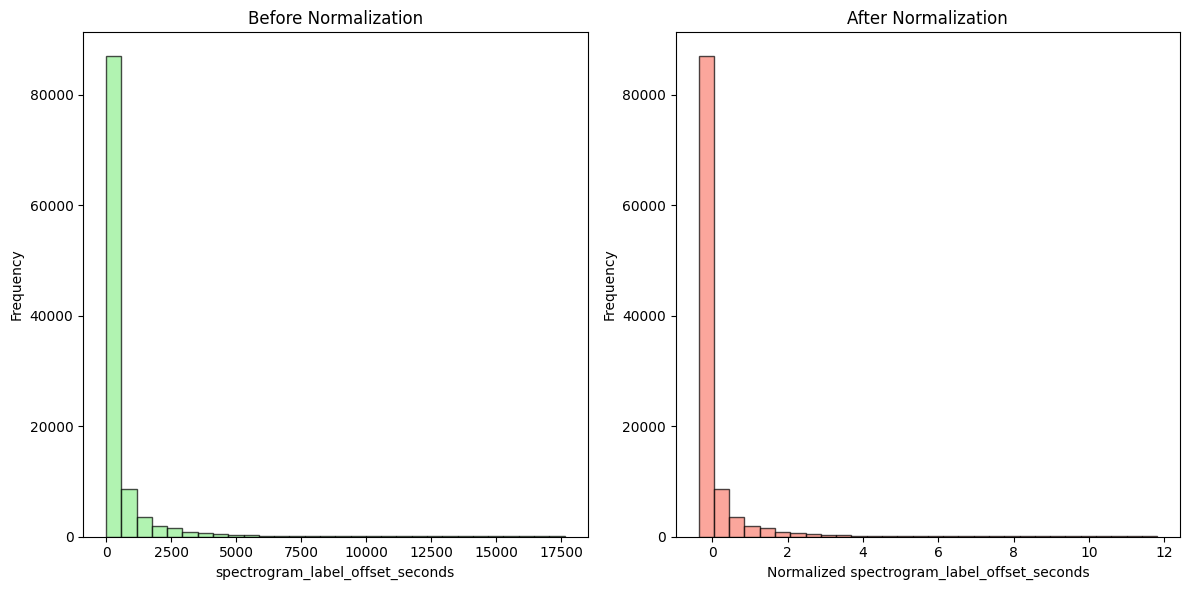

In [34]:
##Normalization plots

plt.figure(figsize=(12, 6))

#Before normalization
plt.subplot(1, 2, 1)
plt.hist(train_data['spectrogram_label_offset_seconds'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Before Normalization')
plt.xlabel('spectrogram_label_offset_seconds')
plt.ylabel('Frequency')

#After normalization
plt.subplot(1, 2, 2)
plt.hist(train_data_encoded['spectrogram_label_offset_seconds'], bins=30, color='salmon', edgecolor='black', alpha=0.7)
plt.title('After Normalization')
plt.xlabel('Normalized spectrogram_label_offset_seconds')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
train_data_encoded.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,GPD,GRDA,LPD,LRDA,Other,Seizure
0,1628180742,0,-0.377730,353733,0,-0.358979,127492639,42516,1.378922,-0.403991,-0.403888,-0.443795,-0.475295,-0.542998,0.0,0.0,0.0,0.0,0.0,1.0
1,1628180742,1,-0.358655,353733,1,-0.354841,3887563113,42516,1.378922,-0.403991,-0.403888,-0.443795,-0.475295,-0.542998,0.0,0.0,0.0,0.0,0.0,1.0
2,1628180742,2,-0.352297,353733,2,-0.353461,1142670488,42516,1.378922,-0.403991,-0.403888,-0.443795,-0.475295,-0.542998,0.0,0.0,0.0,0.0,0.0,1.0
3,1628180742,3,-0.320506,353733,3,-0.346563,2718991173,42516,1.378922,-0.403991,-0.403888,-0.443795,-0.475295,-0.542998,0.0,0.0,0.0,0.0,0.0,1.0
4,1628180742,4,-0.301432,353733,4,-0.342425,3080632009,42516,1.378922,-0.403991,-0.403888,-0.443795,-0.475295,-0.542998,0.0,0.0,0.0,0.0,0.0,1.0


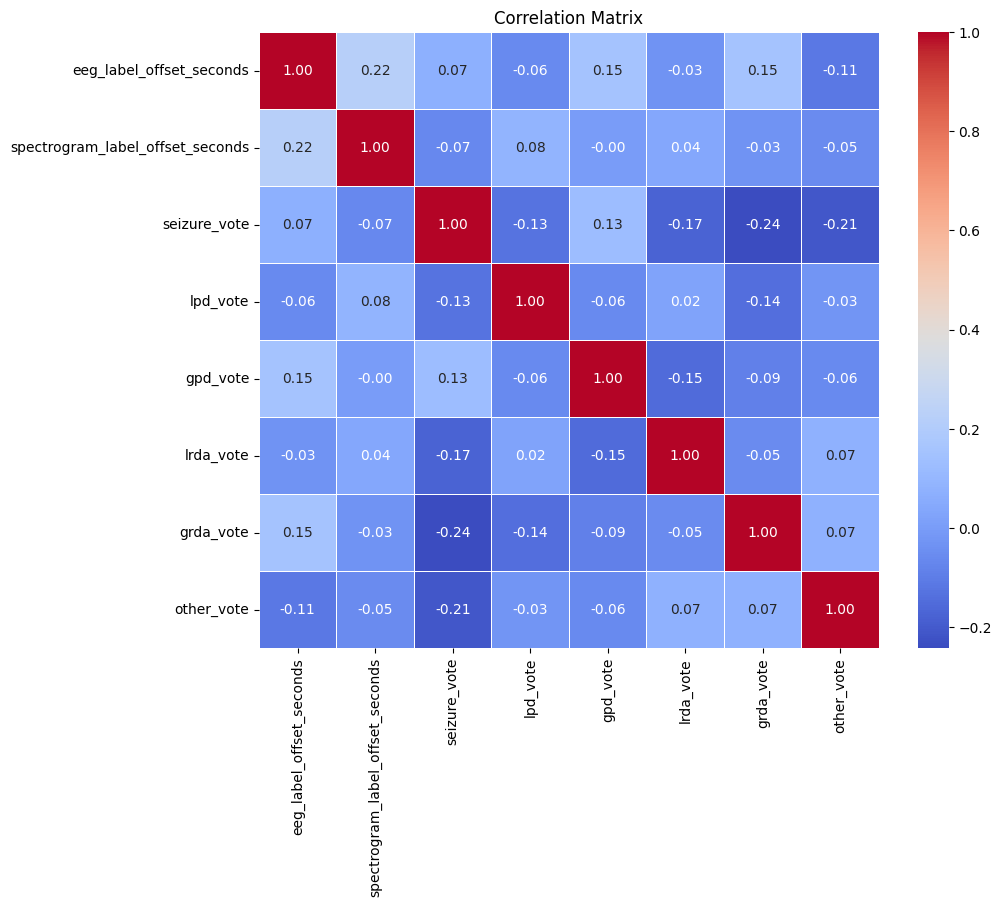

In [30]:
##Correlation matrix
correlation_matrix = train_data_encoded[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()